In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import rcParams
import pandas as pd
import seaborn as sns
matplotlib_font_size=7
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = matplotlib_font_size
# rcParams['pdf.fonttype'] = 42
# rcParams['ps.fonttype'] = 42
# rcParams['svg.fonttype'] = 'none'


path_figures=Path().cwd().parent.parent/"figures"
path_figures.mkdir(parents=True, exist_ok=True)
path_benchmark_data=Path.cwd().parent.parent/"benchmark_for_test"
path_benchmark_data.mkdir(parents=True, exist_ok=True)

In [8]:
steps=[
    "open_search", 
    "neutral_loss_search",
    "hybrid_search"
    ]

library_size=1_000_000
query_size=100
ion_mode=[-1, 1]


In [9]:

df=[]
for charge in ion_mode:
    for i in range(query_size):
        data={"total_library_number":library_size, "query_idx":i, "charge":charge}
        
        for step in steps:       
            
            # path_benchmark_dynamic_fast_search=path_benchmark_data/f"dynamic_fast_search_{charge}_{library_size}_compare_time_{step}_step_query_{i}.txt"
            path_benchmark_dynamic_fast_update=path_benchmark_data/f"dynamic_fast_update_{charge}_{library_size}_compare_time_{step}_step_query_{i}.txt"
            path_benchmark_dynamic_convert_to_flash=path_benchmark_data/f"dynamic_convert_to_flash_{charge}_{library_size}_compare_time_{step}_step_query_{i}.txt"
            path_benchmark_flash=path_benchmark_data/f"flash_{charge}_{library_size}_compare_time_{step}_step_query_{i}.txt"
            try:
                path_benchmark_masstplus=path_benchmark_data/f"masstplus_{charge}_{library_size}_compare_time_{step}_step_query_{i}.txt"
                with open(path_benchmark_masstplus,"r") as f:    
                    masstplus=float(f.readline().strip())
                data["masstplus"]=masstplus
            except:
                data["masstplus"]=None

            # with open(path_benchmark_dynamic_fast_search,"r") as f:
            #     dynamic_fast_search=float(f.readline().strip())

            with open(path_benchmark_dynamic_fast_update,"r") as f:
                dynamic_fast_update=float(f.readline().strip())

            with open(path_benchmark_dynamic_convert_to_flash,"r") as f:
                dynamic_convert_to_flash=float(f.readline().strip())

            with open(path_benchmark_flash,"r") as f:    
                flash=float(f.readline().strip())

               

            # data["dynamic_entropy_search(fast_search)"]=dynamic_fast_search
            data["dynamic_entropy_search(fast_update)"]=dynamic_fast_update
            data["dynamic_entropy_search(convert_to_flash)"]=dynamic_convert_to_flash
            data["flash_entropy_search"]=flash
            data["search_type"]=step

                            
                        
            df.append(pd.DataFrame([data]))
        
df=pd.concat(df)
            
df


/tmp/ipykernel_1392631/2355372192.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df=pd.concat(df)


,total_library_number,query_idx,charge,masstplus,dynamic_entropy_search(fast_update),dynamic_entropy_search(convert_to_flash),flash_entropy_search,search_type
0,1000000,0,-1,NaN,0.011600,0.009376,0.008925,open_search
0,1000000,0,-1,NaN,0.015942,0.012870,0.012074,neutral_loss_search
0,1000000,0,-1,8.089402,0.073174,0.062527,0.051221,hybrid_search
0,1000000,1,-1,NaN,0.006433,0.007887,0.004420,open_search
0,1000000,1,-1,NaN,0.022097,0.007892,0.007812,neutral_loss_search
...,...,...,...,...,...,...,...,...
0,1000000,98,1,NaN,0.016792,0.012530,0.010923,neutral_loss_search
0,1000000,98,1,7.212000,0.132641,0.118401,0.107039,hybrid_search
0,1000000,99,1,NaN,0.005628,0.005143,0.003136,open_search
0,1000000,99,1,NaN,0.005772,0.005356,0.003793,neutral_loss_search


In [10]:

df_data = df[["search_type", 
            # "dynamic_entropy_search(fast_search)",
            "dynamic_entropy_search(fast_update)",
            "dynamic_entropy_search(convert_to_flash)", 
            "flash_entropy_search",
            "masstplus",
            "charge"]]
    
df_melted=df_data.melt(id_vars=["charge", "search_type"], var_name="method", value_name="time")
df_melted        
        


,charge,search_type,method,time
0,-1,open_search,dynamic_entropy_search(fast_update),0.011600
1,-1,neutral_loss_search,dynamic_entropy_search(fast_update),0.015942
2,-1,hybrid_search,dynamic_entropy_search(fast_update),0.073174
3,-1,open_search,dynamic_entropy_search(fast_update),0.006433
4,-1,neutral_loss_search,dynamic_entropy_search(fast_update),0.022097
...,...,...,...,...
2395,1,neutral_loss_search,masstplus,NaN
2396,1,hybrid_search,masstplus,7.212000
2397,1,open_search,masstplus,NaN
2398,1,neutral_loss_search,masstplus,NaN


/tmp/ipykernel_1392631/3431261507.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
/tmp/ipykernel_1392631/3431261507.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
/tmp/ipykernel_1392631/3431261507.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


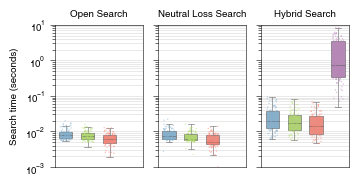

In [ ]:
charge=-1
df_charge=df_melted[df_melted["charge"]==charge]
hue_order=["dynamic_entropy_search(fast_update)", "dynamic_entropy_search(convert_to_flash)", "flash_entropy_search", "masstplus"]
color_palette_set2 = sns.color_palette("Set3", 12)

color_palette={
    
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    "dynamic_entropy_search(convert_to_flash)": color_palette_set2[6],
    "flash_entropy_search":color_palette_set2[3],
    "masstplus":color_palette_set2[-3]

}
legend_labels = {
    
    "dynamic_entropy_search(fast_update)": "Dynamic Entropy Search", 
    "dynamic_entropy_search(convert_to_flash)": "Dynamic Entropy Search (with index converted)",
    "flash_entropy_search": "Flash Entropy Search",
    "masstplus": "MASST+"
}

# Plotting
        
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3.6, 2.4), width_ratios=[1.2,1.2,1.2], sharex=False, sharey=True)

for i, search in enumerate(["open_search", "neutral_loss_search", "hybrid_search"]):
    df_plot=df_charge[df_charge["search_type"]==search]
    ax=axes[i]
    ax.grid(True, which="both", axis="y", ls="-", alpha=0.5, linewidth=0.4)
    ax.set_title(search.replace("_"," ").title(), fontsize=matplotlib_font_size)

    sns.stripplot(x="method", y="time", hue="method", data=df_plot, hue_order=hue_order, palette=color_palette, dodge=False, jitter=0.25, size=1, alpha=0.5, linewidth=0, ax=ax)        
            
    sns.boxplot(x="method", y="time", hue="method", data=df_plot, hue_order=hue_order, dodge=False, palette=color_palette, linewidth=0.4, width=0.6, ax=ax, fliersize=0, legend=False)
    
    ax.tick_params(which="both", width=0.4)          
    for spine in ax.spines.values():  
        spine.set_linewidth(0.4)
        
    ax.legend().remove()

    ax.set_yscale("log")
    ax.set_ylim(1e-3, 1e1)
    ax.set_ylabel("Search time (seconds)")
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_xticks([])

if charge==-1:
    mode="-"
elif charge==1:
    mode="+"

handles = []
for method in hue_order:
    handle = plt.Line2D([0], [0], marker='o', color=color_palette[method], 
                       markersize=3, linestyle='',label=legend_labels.get(method, method))
    handles.append(handle)

fig.legend(handles=handles, 
           loc='upper center', 
           bbox_to_anchor=(0.5, 1.2), 
           ncol=4, 
           fontsize=matplotlib_font_size,
           frameon=True)


plt.tight_layout()
plt.subplots_adjust(bottom=0.3)

# Save figure
plt.savefig(path_figures / f"compare_time_different_search_methods_charge_{charge}_lib_scale_1000000.svg", bbox_inches="tight")

/tmp/ipykernel_1392631/550648572.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
/tmp/ipykernel_1392631/550648572.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
/tmp/ipykernel_1392631/550648572.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


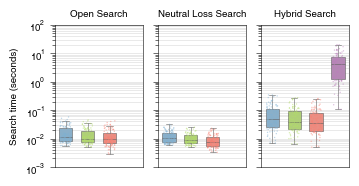

In [ ]:
charge=1
df_charge=df_melted[df_melted["charge"]==charge]
hue_order=["dynamic_entropy_search(fast_update)", "dynamic_entropy_search(convert_to_flash)", "flash_entropy_search", "masstplus"]
color_palette_set2 = sns.color_palette("Set3", 12)

color_palette={
    
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    "dynamic_entropy_search(convert_to_flash)": color_palette_set2[6],
    "flash_entropy_search":color_palette_set2[3],
    "masstplus":color_palette_set2[-3]
}

# Plotting
        
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3.6, 2.4), width_ratios=[1.2,1.2,1.2], sharex=False, sharey=True)

for i, search in enumerate(["open_search", "neutral_loss_search", "hybrid_search"]):
    df_plot=df_charge[df_charge["search_type"]==search]
    ax=axes[i]
    ax.grid(True, which="both", axis="y", ls="-", alpha=0.5, linewidth=0.4)
    ax.set_title(search.replace("_"," ").title(), fontsize=matplotlib_font_size)

    sns.stripplot(x="method", y="time", hue="method", data=df_plot, hue_order=hue_order, palette=color_palette, dodge=False, jitter=0.25, size=1, alpha=0.5, linewidth=0, ax=ax, legend=False)        
            
    sns.boxplot(x="method", y="time", hue="method", data=df_plot, hue_order=hue_order, dodge=False, palette=color_palette, linewidth=0.4, width=0.6, ax=ax, fliersize=0, legend=False)

    ax.tick_params(which="both", width=0.4)          
    for spine in ax.spines.values():  
        spine.set_linewidth(0.4)

    ax.legend().remove()

    ax.set_yscale("log")
    ax.set_ylabel("Search time (seconds)")
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_ylim(1e-3, 1e2)
if charge==-1:
    mode="-"
elif charge==1:
    mode="+"

handles = []
for method in hue_order:
    handle = plt.Line2D([0], [0], marker='o', color=color_palette[method], 
                       markersize=3, linestyle='',label=legend_labels.get(method, method))
    handles.append(handle)

fig.legend(handles=handles, 
           loc='upper center', 
           bbox_to_anchor=(0.5, 1.2), 
           ncol=4, 
           fontsize=matplotlib_font_size,
           frameon=True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
# Save figure
plt.savefig(path_figures / f"compare_time_different_search_methods_charge_{charge}_lib_scale_1000000.svg", bbox_inches="tight")